In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random
%matplotlib inline

First, let's pull a dataframe containing county-level census data. Specifically, we'll be cleaning it up so that we're looking at the percentage of adults with a bachelor's degree (recorded between 2013 and 2017) for each county.

In [2]:
education = pd.read_csv('data/Education.csv', encoding='ISO-8859-1', header=0)
education = education[['Area name','State', "Percent of adults with a bachelor's degree or higher, 2013-17"]]
education.columns = ['County Name','State', 'Percent_Bachelors_Degree']
education = education.dropna().reset_index(drop=True)

1) Plot a histogram of the percentage of adults with a bachelor's degree or higher. Be sure to properly label the title and axes of the graph.

Text(0.5, 0.92, 'Distribution of adults with Bachelors degree or higher')

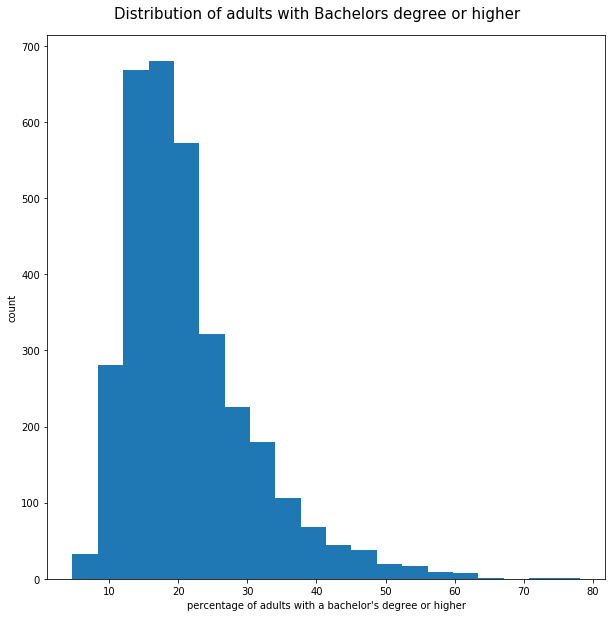

In [3]:
fig = plt.figure(figsize=(10,10))
plt.hist(education["Percent_Bachelors_Degree"], bins=20)
plt.xlabel("percentage of adults with a bachelor's degree or higher")
plt.ylabel('count')
fig.suptitle('Distribution of adults with Bachelors degree or higher', fontsize=15, y=0.92)

2) Is this distribution positively skewed, negatively skewed, or unskewed? If it's skewed, use a transformation to unskew it. Try a few until you find a result that looks closest to a normal distribution and plot a histogram of that transformation, again with proper labelling of the title and axes.

#### This is positively Skewed.

Text(0.5, 0.92, 'Distribution of adults with Bachelors degree or higher')

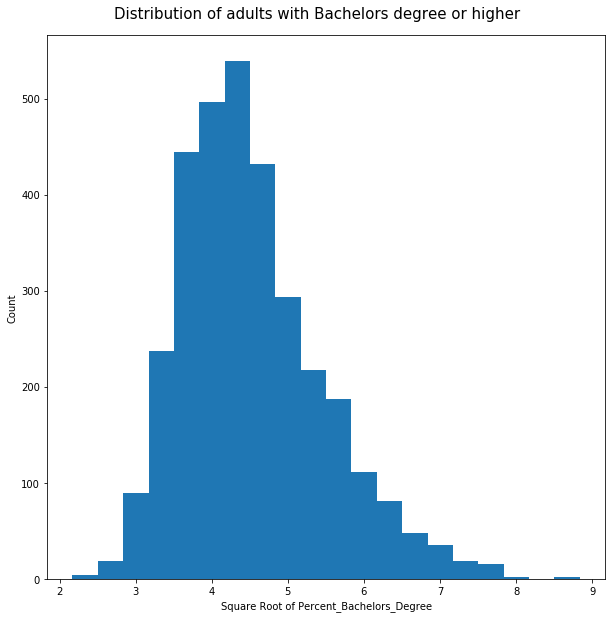

In [4]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.sqrt(education["Percent_Bachelors_Degree"]), bins=20)
plt.xlabel('Square Root of Percent_Bachelors_Degree')
plt.ylabel('Count')
fig.suptitle('Distribution of adults with Bachelors degree or higher', fontsize=15, y=0.92)

Text(0.5, 0.92, 'Distribution of adults with Bachelors degree or higher')

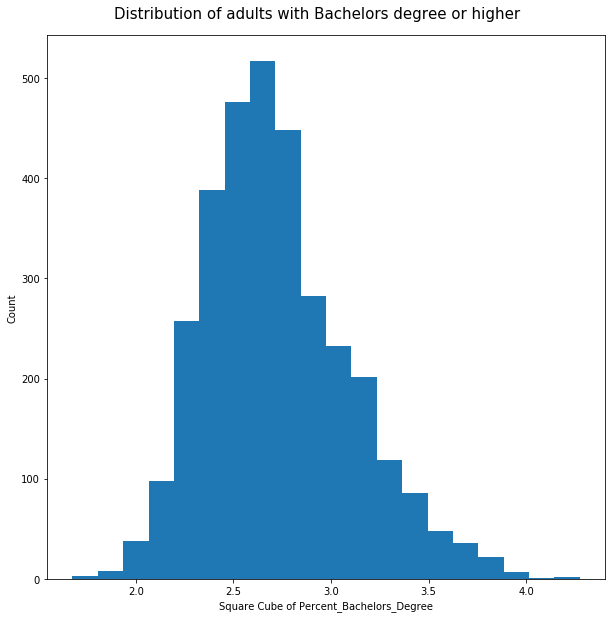

In [5]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.power(education["Percent_Bachelors_Degree"], 1/3), bins=20)
plt.xlabel('Square Cube of Percent_Bachelors_Degree')
plt.ylabel('Count')
fig.suptitle('Distribution of adults with Bachelors degree or higher', fontsize=15, y=0.92)

Text(0.5, 0.92, 'Distribution of adults with Bachelors degree or higher')

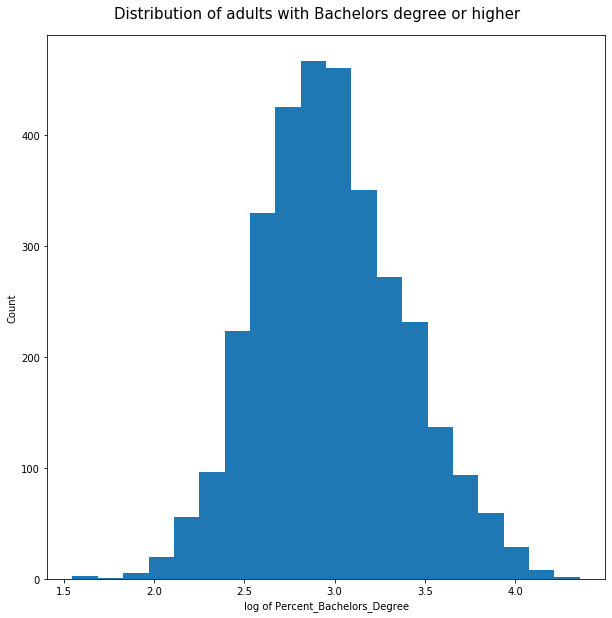

In [6]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.log(education["Percent_Bachelors_Degree"]), bins=20)
plt.xlabel('log of Percent_Bachelors_Degree')
plt.ylabel('Count')
fig.suptitle('Distribution of adults with Bachelors degree or higher', fontsize=15, y=0.92)

Now let's look at this data state-by-state. We'll take the mean value of the percentage of adults with a bachelor degree by state (notice this groupby function, as it may be helpful for aggregating data for your projects).

In [7]:
state_mean = education.groupby('State')['Percent_Bachelors_Degree'].mean().reset_index()
state_mean.head()

,State,Percent_Bachelors_Degree
0,AK,22.733333
1,AL,17.517647
2,AR,15.853947
3,AZ,20.381250
4,CA,26.525424


3) Which state has the highest average percentage of adults with a bachelor's degree? Which state has the lowest? (Hint: Look at the 'Descriptive Statistics Class Notebook' all the way back from Week 2 for an idea of how to query this in the dataframe)

If you are not familiar with which abbreviation corresponds to which state, use this for reference: https://www.50states.com/abbreviations.htm

In [8]:
state_mean[state_mean['Percent_Bachelors_Degree'] == np.max(state_mean['Percent_Bachelors_Degree'])]

,State,Percent_Bachelors_Degree
7,DC,56.6


#### District of Columbia has the highest average percentage of adults with a bachelor's degree.

In [9]:
state_mean[state_mean['Percent_Bachelors_Degree'] == np.min(state_mean['Percent_Bachelors_Degree'])]

,State,Percent_Bachelors_Degree
2,AR,15.853947


#### Arkansas has the lowest average percentage of adults with a bachelor's degree.

4) Plot a boxplot for the percentage of adults with a bachelor degree by state. Are there any outliers? If so, how many? What is the numerical cutoff for an outlier on either side (hint: an outlier is anything greater than 1.5 * the third quantile or anything less than 1.5 * the first quantile)

(Hint: Look at the 'Descriptive Statistics Class Notebook' all the way back from Week 2 for an idea of how to calculate and find this)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb437f0978>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb437f0e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb437f0550>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb437ff748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb437ffa90>],
 'means': []}

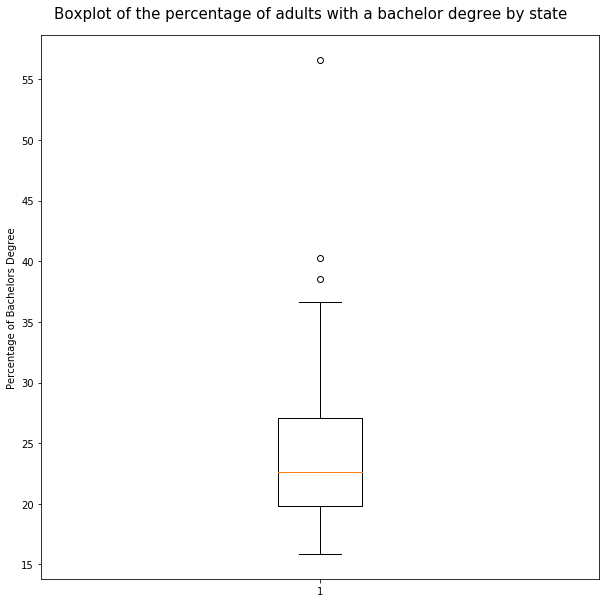

In [10]:
fig = plt.figure(figsize=(10,10))
plt.ylabel('Percentage of Bachelors Degree')
fig.suptitle('Boxplot of the percentage of adults with a bachelor degree by state', fontsize=15, y=0.92)
plt.boxplot(state_mean['Percent_Bachelors_Degree'])

#### Yes, there are three (3) outliers.

In [11]:
state_mean['Percent_Bachelors_Degree'].quantile(0.75)+((state_mean['Percent_Bachelors_Degree'].quantile(0.75)-state_mean['Percent_Bachelors_Degree'].quantile(0.25))*1.5)

37.980898876404495

In [12]:
state_mean['Percent_Bachelors_Degree'].quantile(0.25)-((state_mean['Percent_Bachelors_Degree'].quantile(0.75)-state_mean['Percent_Bachelors_Degree'].quantile(0.25))*1.5)

8.965168539325841

Now, let's read in a dataset that tells us whether a particular state voted for Al Gore or George Bush in 2000.

In [13]:
votes_2016 = pd.read_excel('data/federalelections2016.xlsx', sheet_name=2, skiprows=3, skipfooter=7)
votes_2016.columns = ['State', 'Electoral_Trump', 'Electoral_Clinton', 'Popular_Trump', 'Popular_Clinton', 'Popular_Others', 'Total_Popular']
votes_2016.head()

,State,Electoral_Trump,Electoral_Clinton,Popular_Trump,Popular_Clinton,Popular_Others,Total_Popular
0,AL,9,NaN,1318255,729547,75570,2123372
1,AK,3,NaN,163387,116454,38767,318608
2,AZ,11,NaN,1252401,1161167,159597,2573165
3,AR,6,NaN,684872,380494,65310,1130676
4,CA,NaN,55,4483814,8753792,943998,14181604


And let's make a list of which states voted blue and voted red based on their electoral vote (note that Maine registered 3 votes for Clinton and 1 for Trump - we will count it as a blue state for this exercise)

In [14]:
blue_states = list(votes_2016[votes_2016['Electoral_Clinton'].notnull()]['State'])
red_states = list(votes_2016[votes_2016['Electoral_Trump'].notnull()]['State'])
#Remove Value from List
red_states.remove('ME')

Finally, we can get dataframes of the percentage of adults with a bachelor's degree for both blue states and red states.

In [15]:
blue_state_means = state_mean[state_mean['State'].isin(blue_states)]
red_state_means = state_mean[state_mean['State'].isin(red_states)]

5) Plot a boxplot showing blue states and red states (hint: you can plot two separate items in a boxplot by plotting an array, i.e. :  
plt.boxplot([df_a['a'], df_b['a'], labels=['a','b'])

Do blue states or red states have a higher mean % of bachelor degrees? What are the means of each? What is the mean difference between the two?

Do either groups of states have outliers? Which states are outliers?

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb453f7978>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb454139e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb453f7e10>,
 'medians': [<matplotlib.lines.Line2D at 0x1eb45413dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1eb45403668>,
 'means': []}

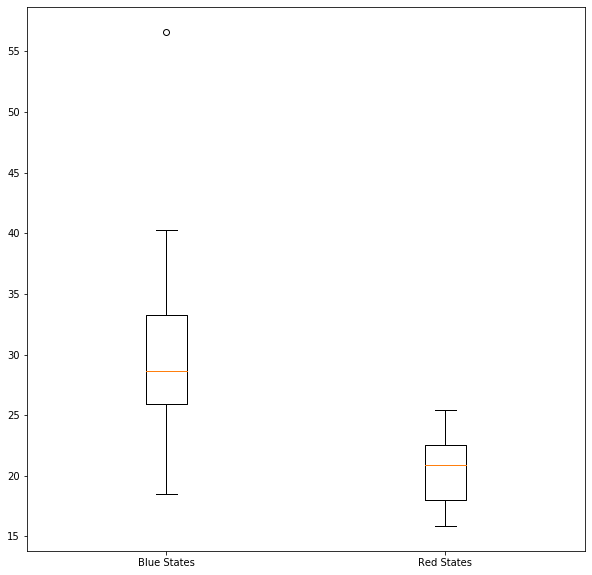

In [16]:
fig = plt.figure(figsize=(10,10))
plt.boxplot([blue_state_means['Percent_Bachelors_Degree'], red_state_means['Percent_Bachelors_Degree']], labels=['Blue States','Red States'])

In [17]:
np.mean(blue_state_means['Percent_Bachelors_Degree'])

30.27389596603505

In [18]:
np.mean(red_state_means['Percent_Bachelors_Degree'])

20.320469809727662

In [19]:
np.mean(blue_state_means['Percent_Bachelors_Degree'])-np.mean(red_state_means['Percent_Bachelors_Degree'])

9.953426156307387

#### Yes blue states have outliers.

In [20]:
blue_state_means[blue_state_means['Percent_Bachelors_Degree'] >41]

,State,Percent_Bachelors_Degree
7,DC,56.6


6) Using the pooled variance function below, find the pooled variance and pooled standard deviation for the two groups of states.

In [21]:
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))

In [22]:
pooled_var = custom_pooled_variance(blue_state_means['Percent_Bachelors_Degree'],red_state_means['Percent_Bachelors_Degree'])
print('Pooled Variance:', np.round(pooled_var, 2))
print('Pooled Standard Deviation:', np.round(np.sqrt(pooled_var), 2))

Pooled Variance: 2.71
Pooled Standard Deviation: 1.65


7) Say that we want to see if the average percentage of adults with bachelor's degrees is higher in blue states than in red states. In this case, what is our null hypothesis and our alternate hypothesis?

#### NH- the average percentage of adults with bachelor's degrees is equal to red states
#### AH- the average percentage of adults with bachelor's degrees is higher in blue states than in red states

8) Find the proper parameters for the T-distribution to test our null hypothesis. What is the mean, standard deviation, and degrees of freedom of our null hypothesis?

In [23]:
df = len(blue_states) + len(red_states) - 2
print(df)

49


In [24]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=49)

In [25]:
dist.mean()

0.0

In [26]:
dist.std()

1.6805165279737184

Mean: 0  
Standard Deviation: 1.65  
Degrees of Freedom: 49  

9) At a signifiance level of 0.05, what are the rejection region (s?) of our distribution? Make a plot highlighting these rejection region (s?) in red.

Rejection Region: greater than 2.76


Text(0.5, 0.92, 'T-Distribution of Difference Between red and blue states')

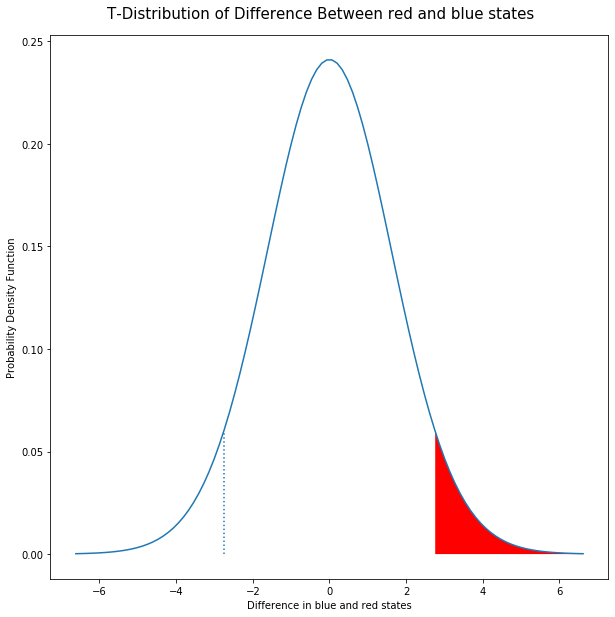

In [27]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=49)
print('Rejection Region: greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.05), dist.ppf(0.05)],[0, dist.pdf(dist.ppf(0.05))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.xlabel('Difference in blue and red states')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between red and blue states', fontsize=15, y=0.92)

10) At a significance level of 0.05, can we reject the null hypothesis? What is the p-value of our observed difference?

#### Yes ,since mean difference 9.953 is bigger than 2.76,we can reject the null hypothesis.

Yes, we can reject the null hypothesis, as the mean difference of 9.95 is much higher than the rejection cutoff of 2.76 and has a p-value of close to 0.

BONUS: 11) Now run a boostrapping example using 10,000 simulations. Use np.random.seed(42) to ensure consistency if you run again. Concatenate the blue states and red states, shuffle them, and then break out new blue states and red states, similar to what we did last week in class. Record the difference between the blue states and red states.

Plot a histogram of the 10,000 differences recorded. What is the average difference?

np.random.seed(42)
diff = []
for i in range(10000):
    total = blue_state_means['Percent_Bachelors_Degree'] + red_state_means['Percent_Bachelors_Degree']
    np.random.shuffle(total)
    new_a = total[:len(blue_state_means['Percent_Bachelors_Degree'])]
    new_b = total[len(blue_state_means['Percent_Bachelors_Degree']):]
    diff.append(np.mean(new_b) - np.mean(new_a))
 
 
 
 not sure why this code is giving errors

BONUS: 12) At a signifiance level of 0.05, what are the rejection region (s?) of our distribution?


### np.percentile(diff, 95)


BONUS: 13) At a significance level of 0.05, can we reject the null hypothesis? What is the p-value of our observed difference?

#### we can reject the null hypothesis if the our mean 9.953 is greater than rejection region.since my code is note running,i cant tell.